In [ ]:
# time series prediction
# two tasks:

In [2]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

from sklearn.preprocessing import MinMaxScaler

In [3]:
# load data
df = pd.read_csv(
    'data/gas_price_2017_2023.csv',
    index_col = 'Date',
    parse_dates = ['Date'],
    date_parser = lambda dates: pd.to_datetime(dates, format = "%m/%d/%Y"))

In [4]:
df.drop(df.tail(115).index, inplace = True)

In [5]:
df1 = df.dropna()

In [6]:
df1.isnull().values.sum()

0

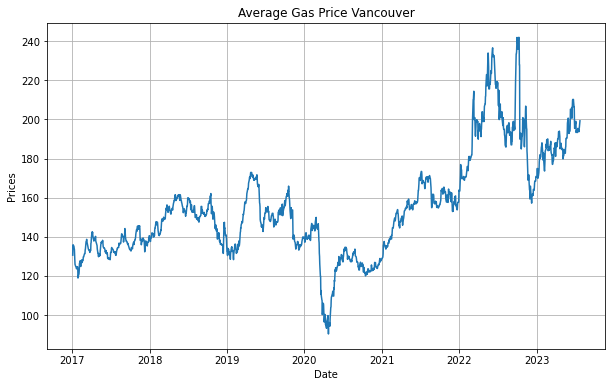

In [7]:
# plot price
plt.figure(figsize = (10,6))
plt.grid(True)
plt.xlabel('Date')
plt.ylabel('Prices')
plt.plot(df1['VANCOUVER'])
plt.title('Average Gas Price Vancouver')
plt.show()

<AxesSubplot:ylabel='Density'>

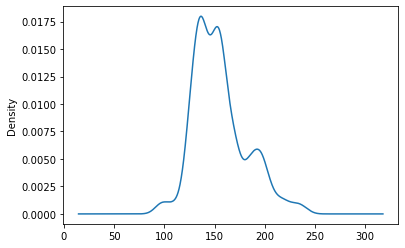

In [8]:
# distribution of dataset
df_price = df1['VANCOUVER']
df_price.plot(kind = 'kde')

<Figure size 432x288 with 0 Axes>

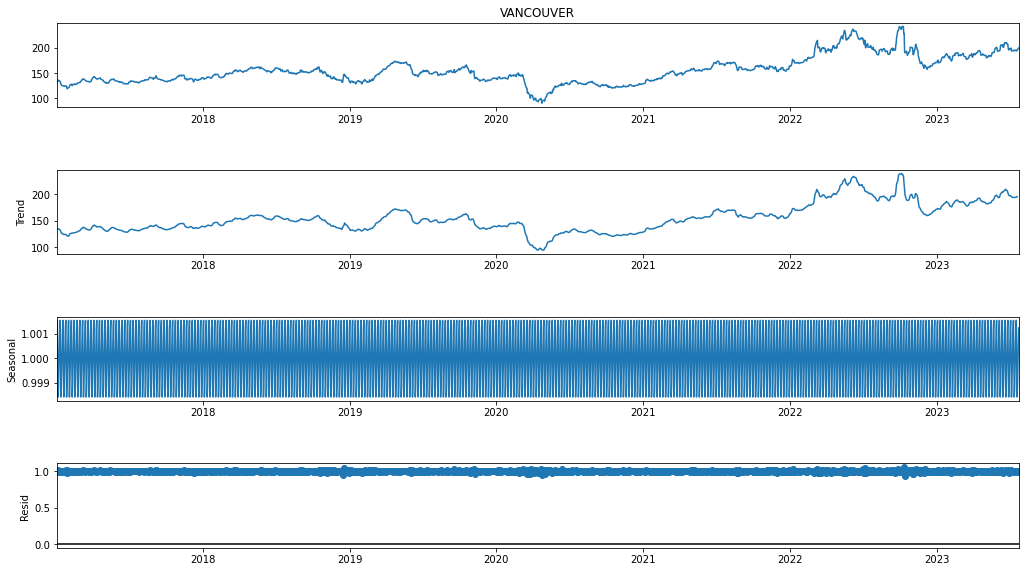

In [9]:
# Isolating trend and seasonality
result = seasonal_decompose(df_price, model = 'multiplicative')
fig = plt.figure()
fig = result.plot()
fig.set_size_inches(16,9)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


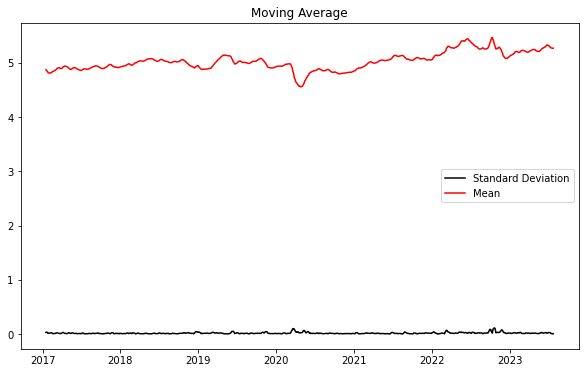

In [10]:
# Elimitating trend
from pylab import rcParams
rcParams['figure.figsize'] = 10, 6
df_log = np.log(df_price)
moving_avg = df_log.rolling(12).mean()
std_dev = df_log.rolling(12).std()
plt.legend(loc = 'best')
plt.title('Moving Average')
plt.plot(std_dev, color = 'black', label = 'Standard Deviation')
plt.plot(moving_avg, color = 'red', label = 'Mean')
plt.legend()
plt.show()

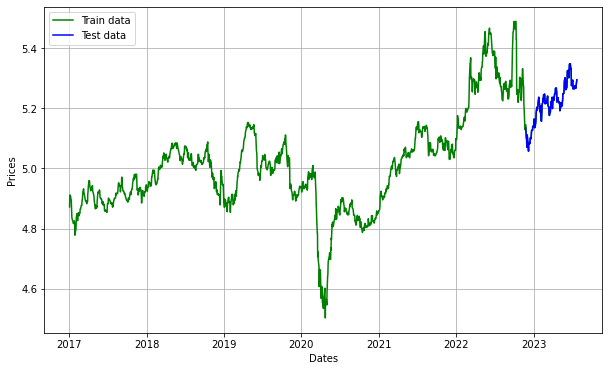

In [11]:
# Split into train and test
train_data, test_data = df_log[3:int(len(df_log)*0.9)], df_log[int(len(df_log)*0.9):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.plot(df_log, 'green', label='Train data')
plt.plot(test_data, 'blue', label='Test data')
plt.legend()

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-8609.081, Time=0.42 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-8620.291, Time=0.32 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-8619.318, Time=0.65 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-8610.895, Time=0.18 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-8620.386, Time=0.31 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=-8618.587, Time=0.66 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-8618.646, Time=0.75 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-8620.705, Time=0.51 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-8618.458, Time=0.62 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-8620.115, Time=0.52 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-8616.267, Time=0.99 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-8622.567, Time=0.36 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-8621.138, Time=0.30 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-8622.133, Time=0.17 sec
 ARIMA(2,1,1)(0,0,0

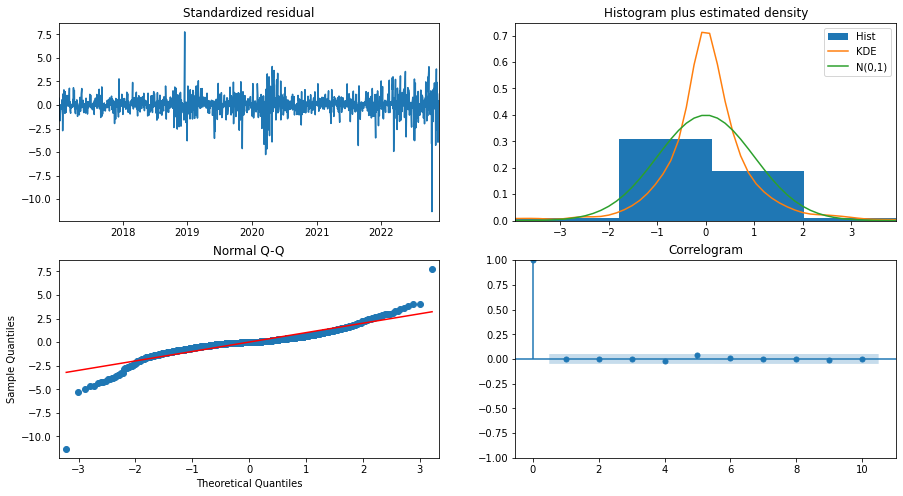

In [12]:
# fitting ARIMA with optimal parameters
model_autoARIMA = auto_arima(train_data, start_p = 0, start_q = 0,
                      test = 'adf',         # use adftest to find optimal 'd'
                      max_p = 3, max_q = 3, # maximum p and q
                      m = 1,                # frequency of series
                      d = None,             # let model determine 'd'
                      seasonal = False,     # No Seasonality
                      start_P = 0, 
                      D = 0, 
                      trace = True,
                      error_action = 'ignore',  
                      suppress_warnings = True, 
                      stepwise = True)
print(model_autoARIMA.summary())
model_autoARIMA.plot_diagnostics(figsize=(15,8))
plt.show()

In [ ]:
# Standardized residual:
# - residual errors appear to have uniform variance and fluctuate around mean of zero

# Histogram plus estimated density
# - density plot suggests normal distribution with a mean of zero

# Normal Q-Q
# - red line appears to be aligned with all the dots, not indicating skewed distribution

# Correlogram
# - residual errors are not autocorrelated, any correlation would imply that residual errors have a pattern that isn't
#   explained by the model.

# The best parameters for the ARIMA model is: ARIMA(1,1,1)(0,0,0)[0]  

In [27]:
# build model
predictions = list()
history = [x for x in train_data]

for t in range(len(test_data)):
    model = ARIMA(history, order = (1, 1, 1))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test_data[t]
    history.append(obs)

c:\Users\james\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\james\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\james\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\james\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\james\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximu

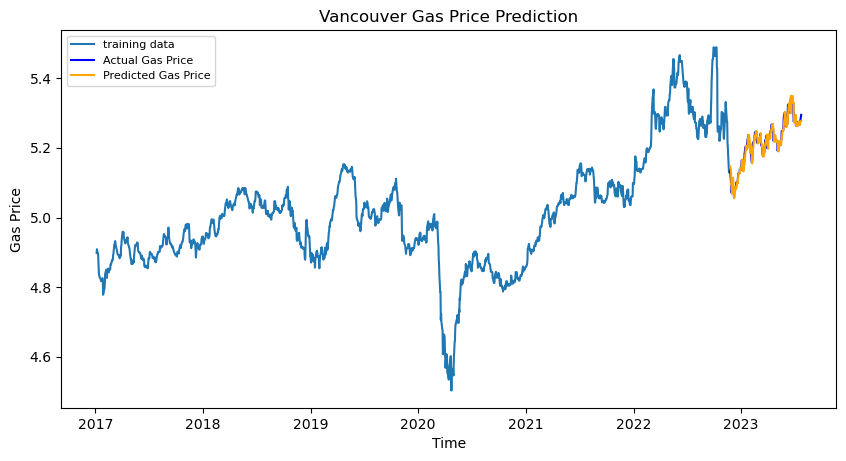

In [29]:
# Make as pandas series
fc_series = pd.Series(predictions, index = test_data.index)

# Plot
plt.figure(figsize=(10,5), dpi=100)
plt.plot(train_data, label='training data')
plt.plot(test_data, color = 'blue', label='Actual Gas Price')
plt.plot(fc_series, color = 'orange',label='Predicted Gas Price')

plt.title('Vancouver Gas Price Prediction')
plt.xlabel('Time')
plt.ylabel('Gas Price')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [30]:
# report performance
mse = mean_squared_error(test_data, predictions)
print('MSE: '+str(mse))
mae = mean_absolute_error(test_data, predictions)
print('MAE: '+str(mae))
rmse = math.sqrt(mean_squared_error(test_data, predictions))
print('RMSE: '+str(rmse))
mape = np.mean(np.abs(predictions - test_data)/np.abs(test_data))
print('MAPE: '+str(mape))

MSE: 0.00019331928044818189
MAE: 0.009879793171306496
RMSE: 0.013903930395689627
MAPE: 0.0018948158153837505


In [8]:
# https://www.analyticsvidhya.com/blog/2021/07/stock-market-forecasting-using-time-series-analysis-with-arima-model/
# https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/